This notebook simulates an analytics dashboard built on top of the machine learning algorithms we previously built. This is what it looks like :

<img src="Img/Visu1.png" style="width: 500px;">
<img src="Img/Visu2.png" style="width: 400px;">
<img src="Img/Visu3.png" style="width: 500px;">

In [1]:
from ipywidgets import widgets
from IPython.display import display
from IPython.core.display import HTML
from IPython.display import clear_output
from ipywidgets import Output
import time

import pandas as pd

import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [2]:
database = pd.read_csv("Database/data.csv",engine="python")
currys = pd.read_csv("Database/currys.csv",engine="python")
currys.drop(currys.columns[0:2],inplace=True, axis=1)
currys.drop(['text','issue','polarity'],axis=1,inplace=True)

In [3]:
social_media = list(database.source.unique())

In [4]:
def toPlotTopics(m):
    to_plot = database[database.source==m]
    total_comments = to_plot.count()[0]
    to_plot = to_plot[to_plot.issue==1]
    to_plot.drop(['text','source','issue','polarity'],axis=1,inplace=True)
    to_plot = to_plot.sum()
    
    plt.title(m+' (total nb of comments: '+str(total_comments)+')')
    to_return = plt.barh(y=to_plot.index, width=to_plot.values, color=plt.get_cmap('Pastel2').colors)
    return(to_return)
    

In [5]:
def toPlotMedia(media):
    n = len(media)
    
    nrows = n//2 + n%2
    ncols = 2

    i=1
    for m in media:
        plt.subplot(nrows, ncols, i)
        toPlotTopics(m)
        i+=1
    plt.show()

In [6]:
def generatePlotMedia(b):
    media = selector.value
    clear_output()
    display(widgets.HBox([selector,button_select]))
    plt.figure(figsize=(20,2.5*len(media)))
    toPlotMedia(media)

In [7]:
def toPlotIssue(issue):
    
    polarity = list(database[database[issue]==1].polarity)
    to_plot = [
        len([p for p in polarity  if p<-0.5]),
        len([p for p in polarity  if -0.5<p<0]),
        len([p for p in polarity  if 0<p<0.5]),
        len([p for p in polarity  if 0.5<p<1]),
    ]

    labels = ['Very Angry', 'Angry', 'Neutral', 'Positive']
    explode = (0.1, 0.1, 0.1, 0.1)
    colors = ['indianred','lightcoral','paleturquoise', 'palegreen']

    plt.title(issue+" polarity")
    return(plt.pie(to_plot, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors))


    #polarity[polarity<-0.5].count()
    #polarity[-0.5<polarity and polarity<0].count()

In [8]:
def toPlotIssues(issues):
    n = len(issues)
    
    nrows = n//3 + n%3
    ncols = 3

    i=1
    for issue in issues:
        plt.subplot(nrows, ncols, i)
        toPlotIssue(issue)
        i+=1
    plt.show()

In [9]:
def generatePlotIssues(b):
    issues = issue_selector.value
    clear_output()
    display(widgets.HBox([issue_selector,button_select_issue]))
    if len(issues) >3 :
        plt.figure(figsize=(10.5,7.5))
    else :
        plt.figure(figsize=(11.25, 3.75))
    toPlotIssues(issues)

In [11]:
def getTime(string):
    return(datetime.datetime.strptime(string, "%d %B %Y"))
currys.date = currys.date.map(getTime)

def getWeek(time):
    return(time.isocalendar()[1])
currys['week'] = currys.date.map(getWeek)

def getYear(time):
    return(time.year)
currys['year'] = currys.date.map(getYear)

currys = currys[currys.year==2017]

In [12]:
currys_to_plot = currys.groupby("week").sum()

In [13]:
def toPlotEvolution(issues, start_week, end_week):
    
    plt.figure(figsize=(10,5))
    
    to_plot = currys_to_plot[currys_to_plot.index>=start_week]
    to_plot = to_plot[to_plot.index<=end_week]
    to_plot = to_plot[issues]
    
    for i in range(len(issues)):
        plt.plot(to_plot.index,to_plot[to_plot.columns[i]],color=plt.get_cmap('tab10').colors[i])
    plt.ylabel("Number of negative comments")
    plt.xlabel("Week of the year")
    plt.grid(b=True, which='both', color='grey', linestyle='--')
    plt.legend(issues)
    plt.colors = plt.get_cmap('Pastel2').colors
    plt.show()

In [14]:
def generatePlotIssuesDates(b) :
    
    start_week = slider.value[0]
    end_week = slider.value[1]
    issues = list(issue_selector_bis.value)
    
    clear_output()
    display(widgets.HBox([issue_selector_bis,slider,button_select_issue_bis]))
    
    toPlotEvolution(issues, start_week, end_week)

A Jupyter Widget

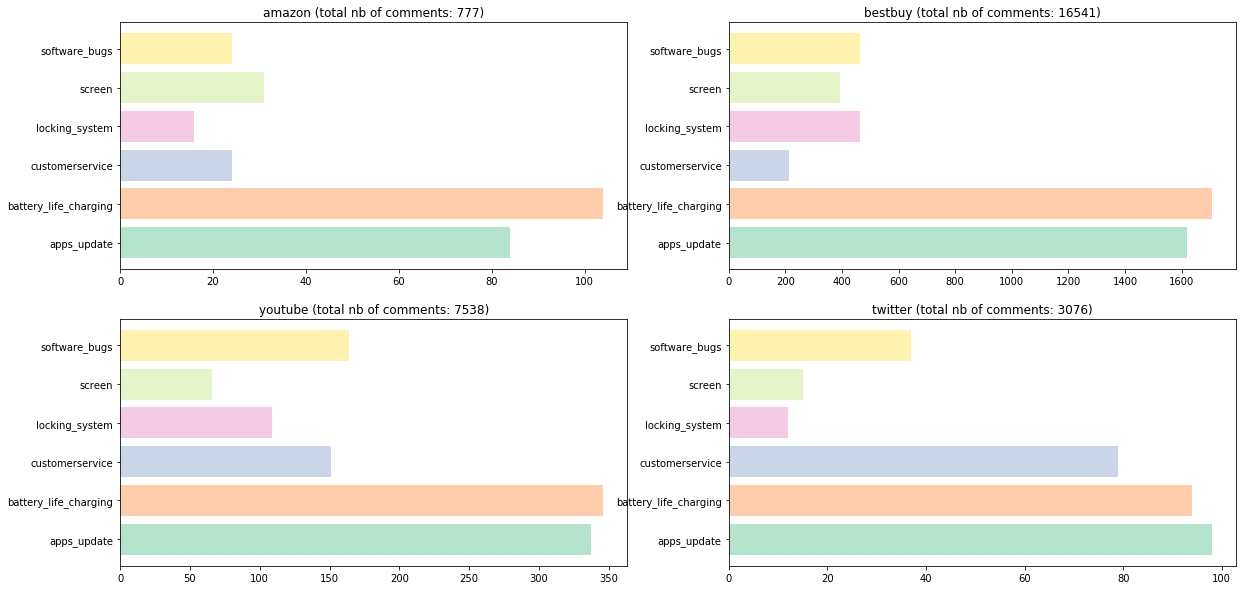

In [15]:
selector = widgets.SelectMultiple(
    options=social_media,
    value=['amazon','bestbuy','youtube','twitter'],
    description='Social media',
    disabled=False)

button_select = widgets.Button(description="Select social media", button_style='success')

display(widgets.HBox([selector,button_select]))

button_select.on_click(generatePlotMedia)

A Jupyter Widget

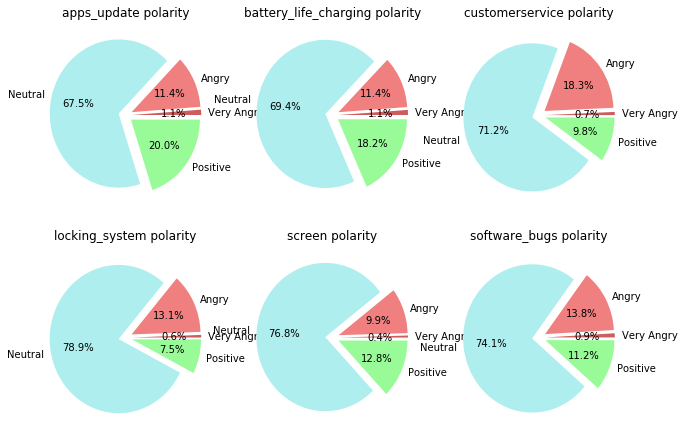

In [16]:
issue_selector = widgets.SelectMultiple(
    options=list(database.columns[1:7]),
    value=list(database.columns[1:7]),
    description='Issues',
    disabled=False)

button_select_issue = widgets.Button(description="Select issues", button_style='success')


display(widgets.HBox([issue_selector,button_select_issue]))

button_select_issue.on_click(generatePlotIssues)

A Jupyter Widget

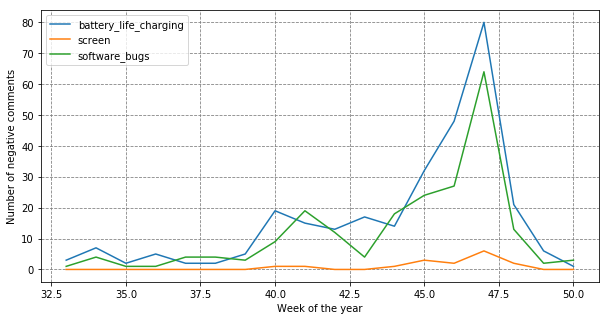

In [17]:
issue_selector_bis = widgets.SelectMultiple(
    options=list(database.columns[1:7]),
    value=list(database.columns[1:7]),
    description='Issues',
    disabled=False)

slider = widgets.IntRangeSlider(
    value=[18, 50],
    min=18,
    max=50,
    step=1,
    description='Year week:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

button_select_issue_bis = widgets.Button(description="Plot", button_style='success')


display(widgets.HBox([issue_selector_bis,slider,button_select_issue_bis]))

button_select_issue_bis.on_click(generatePlotIssuesDates)